Harvey Model = $4 \sigma^2 \tau / (1 + (2\pi \nu \tau)^2 + (2\pi \nu \tau)^4)$   
In pySYD:  
a=p[0],b=p[1]   
Model = $p[0]/(1.+(p[1]*x)^4+(p[1]*x)^2)$   
So    
$a=4 \sigma^2 \tau$    
$b=2\pi* \tau$    

### Can run in notebook_env

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 20

In [4]:
%matplotlib inline

In [5]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
## for this record this now lives in /Onedrive(etc)/work/datatables ##
highmass_rc_newvals

,KIC,numax,new_numax,smooth_numax,Delnu,o_Teff,o_log(g),o_[Fe/H],g_Teff,g_Teff_e,...,a_log(g),a_log(g)_e,a_[Fe/H],a_[Fe/H]_e,L_Teff,L_Teff_e,L_log(g),L_log(g)_e,L_[Fe/H],L_[Fe/H]_e
0,3347458,39.99,40.32,41.422682,3.360,5000,2.519,0.18,NaN,NaN,...,2.525,0.039,0.165,0.007,NaN,NaN,NaN,NaN,NaN,NaN
1,8378545,48.82,48.07,48.952072,3.952,5058,2.608,0.22,NaN,NaN,...,3.142,0.059,0.157,0.007,5009.00,32.00,2.761,0.053,0.323,0.030
2,5978324,49.10,48.78,50.072904,4.024,5051,2.610,-0.07,NaN,NaN,...,2.701,0.050,-0.098,0.008,NaN,NaN,NaN,NaN,NaN,NaN
3,10068490,66.42,58.84,60.906533,5.206,5189,2.747,-0.14,5740.95,4.38,...,2.769,0.062,-0.201,0.010,5254.75,37.05,2.699,0.061,-0.216,0.035
4,4756133,80.81,80.29,83.967767,5.865,5152,2.831,0.11,NaN,NaN,...,3.014,0.056,0.091,0.008,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,10162765,88.56,85.53,89.092562,6.760,4948,2.862,0.18,NaN,NaN,...,2.858,0.049,0.076,0.008,5099.89,22.44,2.974,0.034,0.085,0.018
110,3430048,35.82,33.63,37.856607,3.487,5079,2.474,0.17,NaN,NaN,...,2.502,0.039,0.106,0.007,NaN,NaN,NaN,NaN,NaN,NaN
111,7116721,50.86,50.97,53.768334,4.522,5028,2.624,-0.26,NaN,NaN,...,NaN,NaN,NaN,NaN,4798.39,26.51,2.677,0.044,0.049,0.025
112,7347076,90.59,90.65,94.236618,7.216,5386,2.890,-0.17,NaN,NaN,...,NaN,NaN,NaN,NaN,5076.47,46.21,2.915,0.076,-0.007,0.044


In [6]:
# output_file = open('../../pysyd-work/info/todo.txt','w')
# # output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')

# for i in range(0,len(highmass_rc)):
#     output_file.write(str(highmass_rc['KIC'][i])+'\n')
    
# output_file.close()

print('id | a1 | a1_sig | a2 | a2_sig | a3 | a3_sig | b1 | b1_sig | b2 | b2_sig | b3 | b3_sig | whitenoise | whitenoise_sig')

seis_file = open('../data/JieBGfits/3347458.seis','r') #2158410
# print(seis_file.readlines()[9:11])
seis_file_read = seis_file.readlines()
key_line = seis_file_read[9]
data_line = seis_file_read[10]
print(key_line)
# print(data_line)
print(data_line.split())
seis_file.close()

id | a1 | a1_sig | a2 | a2_sig | a3 | a3_sig | b1 | b1_sig | b2 | b2_sig | b3 | b3_sig | whitenoise | whitenoise_sig
#id|numax|a_i|a_i_sig|b_i|b_i_sig|b2|b2_sig|whitenoise

['3347458', '6170.5631', '494.36326', '27536.265', '155527.43', '115.01863', '354.53875', '0.034685678', '0.0019159402', '0.24321178', '0.23672830', '0.24478977', '0.23537482', '241.03068', '17.806047']


In [7]:
bg_params = data_line.split()
n_harveys = int((len(bg_params)-3)/4)
print('Fit has',n_harveys,'Harvey Models')

tau_list = []
sigma_list = []
for i in range(0,n_harveys):
#     a = float(bg_params[4*i+1])
#     b = float(bg_params[4*i+3])
    a = float(bg_params[2*i+1])
    b = float(bg_params[(2*i)+1+(2*n_harveys)])
#     print(a,b)
    tau = b/(2*np.pi)
    sigma = np.sqrt(a/(4*tau))
    tau_list.append(tau)
    sigma_list.append(sigma)
    print('tau:',tau)
    print('sigma:',sigma)

Fit has 3 Harvey Models
tau: 0.005520397108193806
sigma: 528.6244464247026
tau: 0.038708357005178565
sigma: 421.71607098071854
tau: 0.038959501913828146
sigma: 27.167357738508937


Harvey Model = $4 \sigma^2 \tau / (1 + (2\pi \nu \tau)^2 + (2\pi \nu \tau)^4)$   
In pySYD:  
a=p[0],b=p[1]   
Model = $p[0]/(1.+(p[1]*x)^4+(p[1]*x)^2)$   
So    
$a=4 \sigma^2 \tau$    
$b=2\pi \tau$    

In [8]:
pysyd_file = pd.read_csv('~/pysyd-work/results/3347458/global_2.csv')
print(pysyd_file)

a1 = pysyd_file['value'][6]*pysyd_file['value'][7]**2*4*1e-6
b1 = pysyd_file['value'][6]*2*np.pi*1e-6
a2 = pysyd_file['value'][8]*pysyd_file['value'][9]**2*4*1e-6
b2 = pysyd_file['value'][8]*2*np.pi*1e-6
white = pysyd_file['value'][10]

print(a1,b1,a2,b2)

       parameter         value
0   numax_smooth     40.283750
1       A_smooth   1643.135396
2    numax_gauss     39.376704
3        A_gauss   1815.214119
4           FWHM      8.532829
5            dnu      3.362794
6          tau_1  16746.180480
7        sigma_1    430.277793
8          tau_2   5057.476735
9        sigma_2    486.046284
10         white    486.046284
12401.483061944191 0.10521935514020762 4779.13324046346 0.031777063511805745


In [134]:
# pysyd_file = pd.read_csv('../../pysyd-work/backup_results/3347458/global_5.csv')
# print(pysyd_file)

# aa1 = pysyd_file['value'][6]*pysyd_file['value'][7]**2*4*1e-6
# bb1 = pysyd_file['value'][6]*2*np.pi*1e-6
# aa2 = pysyd_file['value'][8]*pysyd_file['value'][9]**2*4*1e-6
# bb2 = pysyd_file['value'][8]*2*np.pi*1e-6

# print(aa1,bb1,aa2,bb2)

In [9]:
powerspec = pd.read_csv('../data/highmass_rc/KIC3347458_PS.csv')
powerspec

,freq,power,amp
0,0.007871,4.748544,2.179115
1,0.008658,3.647968,1.909965
2,0.009445,2.434887,1.560413
3,0.010232,1.153953,1.074222
4,0.011019,0.190294,0.436227
...,...,...,...
339206,266.996725,0.893173,0.945078
339207,266.997512,0.995985,0.997990
339208,266.998299,1.025415,1.012628
339209,266.999086,0.976264,0.988061


In [10]:
def harvey_tau(nu,tau,sigma):
    numer = 4*sigma**2*tau
    denom = 1 + (2*np.pi*nu*tau)**2 + (2*np.pi*nu*tau)**4
    return numer/denom

def harvey_ab(nu,a,b):
    numer = a
    denom = 1 + (b*nu)**2 + (b*nu)**4
    return numer/denom
    

In [11]:
# plt.figure(figsize=(12,4))

# plt.plot(powerspec['freq'],powerspec['power'])

# pysydharvey = harvey_ab(powerspec['freq'],a1,b1) + harvey_ab(powerspec['freq'],a2,b2)
# plt.plot(powerspec['freq'],pysydharvey,label='pysyd')

# jieharvey = harvey_tau(powerspec['freq'],tau_list[0],sigma_list[0])
# for i in range(1,len(tau_list)):
#     jieharvey = jieharvey + harvey_tau(powerspec['freq'],tau_list[i],sigma_list[i])
# jieharvey = jieharvey #+ float(bg_params[-2])
# plt.plot(powerspec['freq'],jieharvey,label='jie')

# pysydharvey_old = harvey_ab(powerspec['freq'],aa1,bb1) + harvey_ab(powerspec['freq'],aa2,bb2)
# plt.plot(powerspec['freq'],pysydharvey_old,label='pysyd_old')

# # plt.xlim
# (0,100)
# plt.xlim(1,200)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('frequency')
# plt.ylabel('power (ppm^2)')
# plt.legend(loc='lower left')
# # plt.savefig('../bg_power')
# plt.show()

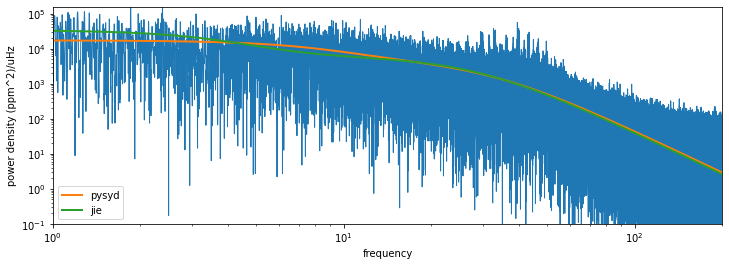

In [12]:
plt.figure(figsize=(12,4))

plt.plot(powerspec['freq'],powerspec['power']*110.079)

pysydharvey = harvey_ab(powerspec['freq'],a1,b1) + harvey_ab(powerspec['freq'],a2,b2)# + white
plt.plot(powerspec['freq'],pysydharvey,label='pysyd',linewidth=2)

jieharvey = harvey_tau(powerspec['freq'],tau_list[0],sigma_list[0])
for i in range(1,len(tau_list)):
    jieharvey = jieharvey + harvey_tau(powerspec['freq'],tau_list[i],sigma_list[i])
jieharvey = jieharvey# + float(bg_params[-2])
plt.plot(powerspec['freq'],jieharvey,label='jie',linewidth=2)

# pysydharvey_old = harvey_ab(powerspec['freq'],aa1,bb1) + harvey_ab(powerspec['freq'],aa2,bb2)
# plt.plot(powerspec['freq'],pysydharvey_old*110.079,linestyle=':',label='pysyd_old')

# plt.xlim(0,100)
plt.xlim(1,200)
# plt.xlim(10,200)
plt.ylim(bottom=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('power density (ppm^2)/uHz')
plt.legend(loc='lower left')
# plt.savefig('../bg_powerdensity')
plt.show()

In [14]:
from astropy.io import fits

In [15]:
lightcurve = fits.open('../data/kepseismic_LCs/KIC10068490_LC.fits')
lightcurve.info()

Filename: ../data/kepseismic_LCs/KIC10068490_LC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   ()      
  1                1 BinTableHDU     16   71964R x 2C   [D, D]   
  2                1 ImageHDU         8   (71964,)   int16   


In [16]:
lightcurve[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'days'
    name = 'FLUX'; format = 'D'; unit = 'ppm'
)

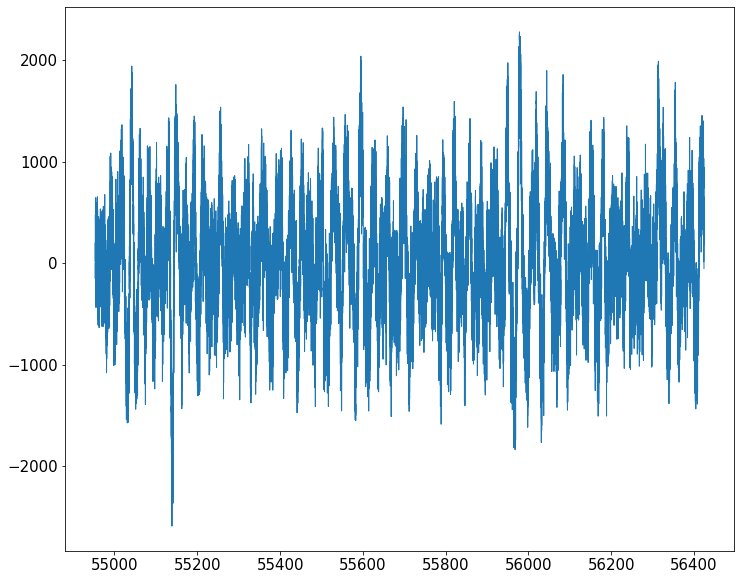

In [20]:
plt.plot(lightcurve[1].data['TIME'],lightcurve[1].data['FLUX'])
plt.show()